# Entendendo como funciona os modelos de Machine Learning

#### Neste caderno contém as formulas matemáticas e o entendimento de como usar, os concceitos dos modelos de ML:

- Regressão Linear,
- Regressão Polinomial, 
- Regressão Logistica, 
- e os modelos de Classificação.

## Regressão Linear

<br>

Assumindo que temos um dataset com p variáveis preditoras $X_1, .., X_p$, N instâcias de treinamento e uma variável target y (numérica), o modelo de regressão linear estima:

O modelo acima possui 2 parâmetros: $\theta_0$ e $\theta_1$. Variando esses dois parâmetros, teremos modelos diferentes, correspondendo a retas diferentes:

#### $y_{pred} = \theta_0 + \theta_1 \cdot X_1 + .. + \theta_p \cdot X_p$.

Onde os valores de $\theta = (\theta_0, \theta_1, .., \theta_p)$ são aqueles que minimizam o MSE no dataset de treinamento:

$MSE(\theta) = $ 1/N $\cdot \sum (y_{pred_i} - y_i)^{2}$, em que a soma é nas instâncias de treinamento.

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.style.use("seaborn-darkgrid")

### O treinamento de um modelo de regressão linear

### Equação normal

No caso da regressão linear, existe uma solução fechada para achar os valores ótimos de $\theta$!

Considere que o dataset de treinamento seja da forma (X, y), em que X - variáveis explicativas - é um array de dimensão (N, p) e y é a variável target.

$\hat \theta = (X^{T} \cdot X)^{-1} \cdot X^{T} \cdot y$

Ou seja, matematicamente:

Calculamos a __transposta__ da matriz X, $X^{T}$ e também a __inversa__ do produto entre a transposta e a matriz.
Na sequência, multiplicamos essa inversa pela transposta de X e por y.

__Obs.:__ Para podermos estimar o parâmetro $\theta_0$, devemos incluir uma coluna a mais em nosso conjunto de variáveis. Essa coluna recebe o valor 1 em todas as entradas. Dessa forma, denotando por $X_0$ essa coluna, e considerando $X = [X_0 X_1 ... X_p],$ calculamos o valor $\hat \theta$ de acordo com a fórmula acima. 

__Importante:__ não é necessário entender como chegamos nesse valor - isso envolve alguns cálculos matemáticos - mas devemos nos atentar a como __os valores de X e y__ fazem parte da solução! Isso mostra como é fundamental o __dataset de treinamento na hora de treinar os modelos!__



In [84]:
# Valores Aleatorios
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

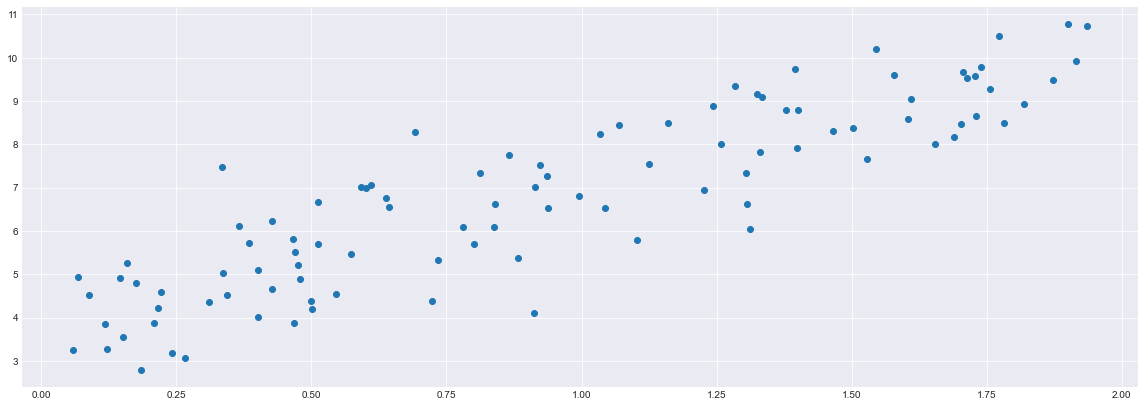

In [85]:
fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

In [86]:
x_b = np.c_[np.ones((100, 1)), x]
theta = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [87]:
theta

array([[3.77006983],
       [3.24412959]])

In [88]:
y_hat = theta[0] + x * theta[1]

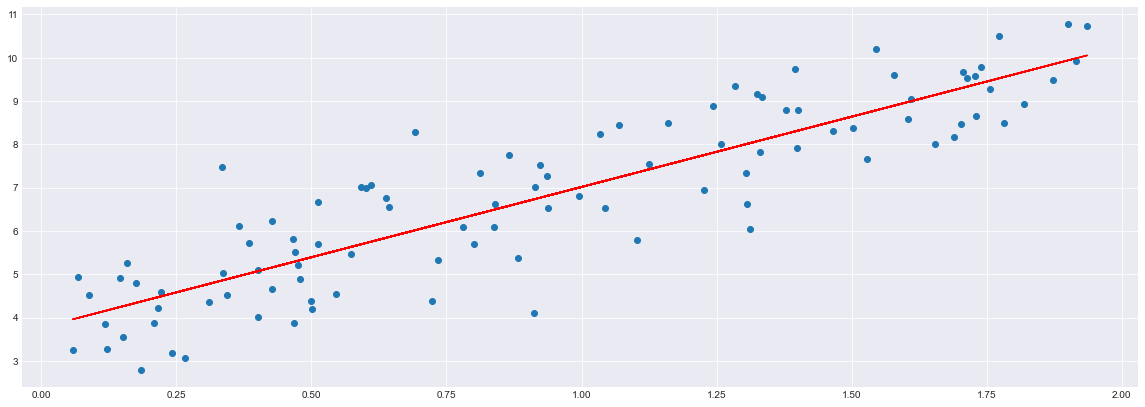

In [89]:
fig, ax = plt.subplots(figsize=(20, 7))
plt.plot(x, y_hat, color= 'red', )
plt.scatter(x, y)

### Regressão linear no sklearn

In [90]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.77006983]), array([[3.24412959]]))

## Batch Gradient Descent

### Gradient Descent

<br>

Para motivar a técnica, considere o problema:

#### Defina uma função $f(x) = x^2$. Pergunta: Qual o valor de x que minimiza f?

Para este caso, é fácil ver que quando x = 0, f(x) = f(0) = $0^2$ = 0. Além disso, como $x^2$ é sempre positivo, qualquer outro valor de x irá resultar em f(x) positivo, de modo que x = 0 é o valor que minimiza f.

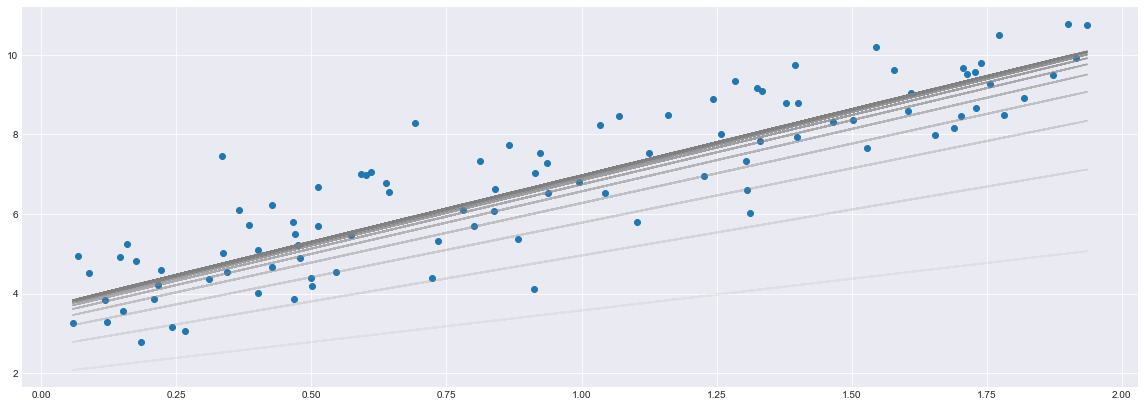

In [91]:
eta = 0.1  # learning rate
n_iterations = 10
m = 100

theta = np.random.randn(2,1)  # random initialization
fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
    
    if iteration % 1 == 0:
        y_hat = theta[0] + x * theta[1]
        ax.plot(x, y_hat, alpha=0.1 + iteration / n_iterations, color="gray")

In [92]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients

Text(0.5, 1.0, 'Eta: 0.1')

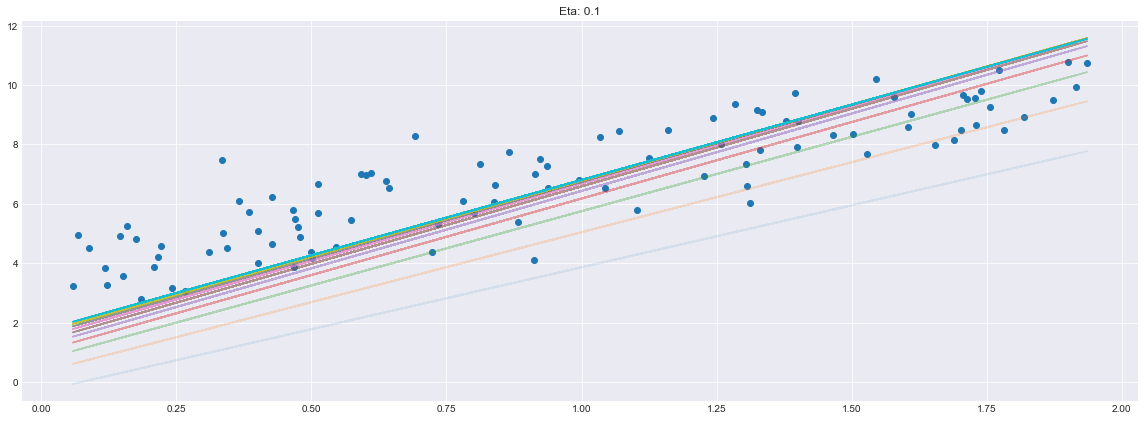

In [93]:
eta = 0.1  # learning rate
n_iterations = 10
m = 100
theta = np.random.randn(2,1)  # random initialization

fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
    
    
    if iteration % 1 == 0:
        y_hat = theta[0] + x * theta[1]
        ax.plot(x, y_hat, alpha=0.1 + iteration / n_iterations)
ax.set_title("Eta: {}".format(eta))

Text(0.5, 1.0, 'Eta: 0.01')

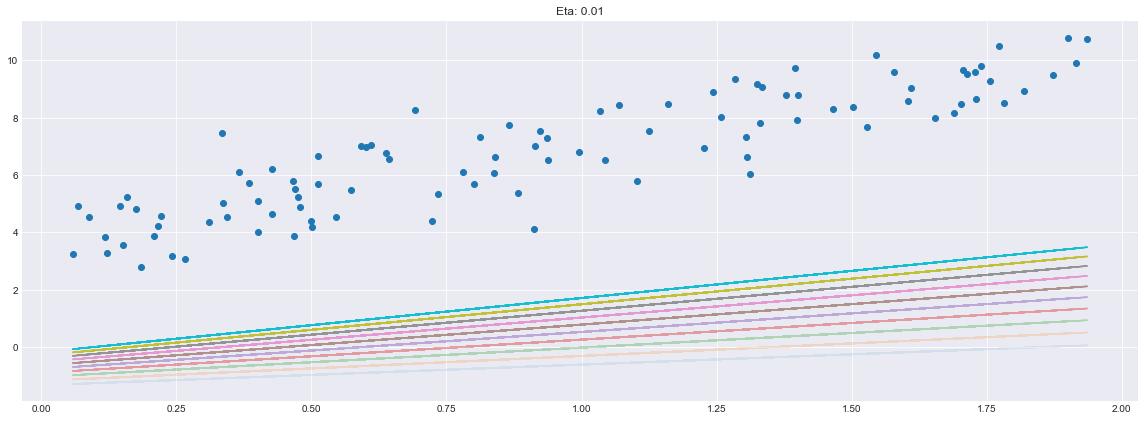

In [94]:
eta = 0.01  # learning rate
n_iterations = 10
m = 100
theta = np.random.randn(2,1)  # random initialization

fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
    
    
    if iteration % 1 == 0:
        y_hat = theta[0] + x * theta[1]
        ax.plot(x, y_hat, alpha=0.1 + iteration / n_iterations)
ax.set_title("Eta: {}".format(eta))

Text(0.5, 1.0, 'Eta: 0.5')

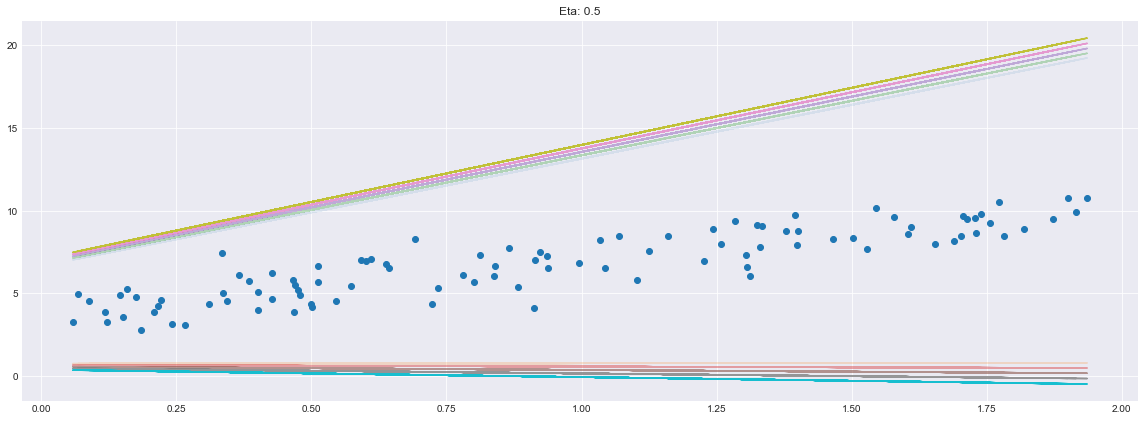

In [95]:
eta = 0.5  # learning rate
n_iterations = 10
m = 100
theta = np.random.randn(2,1)  # random initialization

fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
    
    
    if iteration % 1 == 0:
        y_hat = theta[0] + x * theta[1]
        ax.plot(x, y_hat, alpha=0.1 + iteration / n_iterations)
ax.set_title("Eta: {}".format(eta))


## Regressão Polinomial

Nosso dataset até então é bastante simples, seguindo um __padrão linear.__ E se os dados não seguirem um padrão linear?

Como podemos fitar bons modelos neste caso?

Uma solução é utilizar a __regressão polinomial,__ em que usamos __potências__ das variáveis preditoras para construir os modelos.

Por exemplo, considere que temos duas variáveis $X_1$ e $X_2$ para explicar uma variável target $y$. Podemos modelar 

### $y = \theta_0 + \theta_1 \cdot X_1 + \theta_2 \cdot X_2 + \alpha_1 {X_1}^2
 + \alpha_2 {X_2}^2 + \alpha_3 {X_1}^3 + \alpha_4 {X_2}^3$
 
Esse seria um exemplo de __regressão polinomial de ordem 3!__

In [96]:
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)

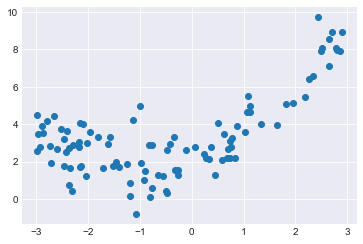

In [97]:
plt.scatter(x, y)

In [98]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)

In [99]:
x_poly[0]

array([2.85991768, 8.17912911])

In [100]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.18166137]), array([[0.92020734, 0.47616034]]))

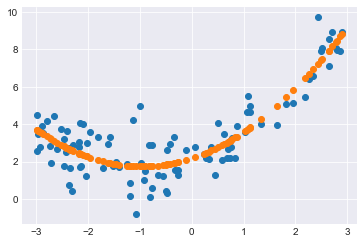

In [101]:
plt.scatter(x, y)
plt.scatter(x, lin_reg.predict(x_poly))

### O que acontece se a complexidade do modelo for aumentada desnecessariamente?

(-4.0, 4.0)

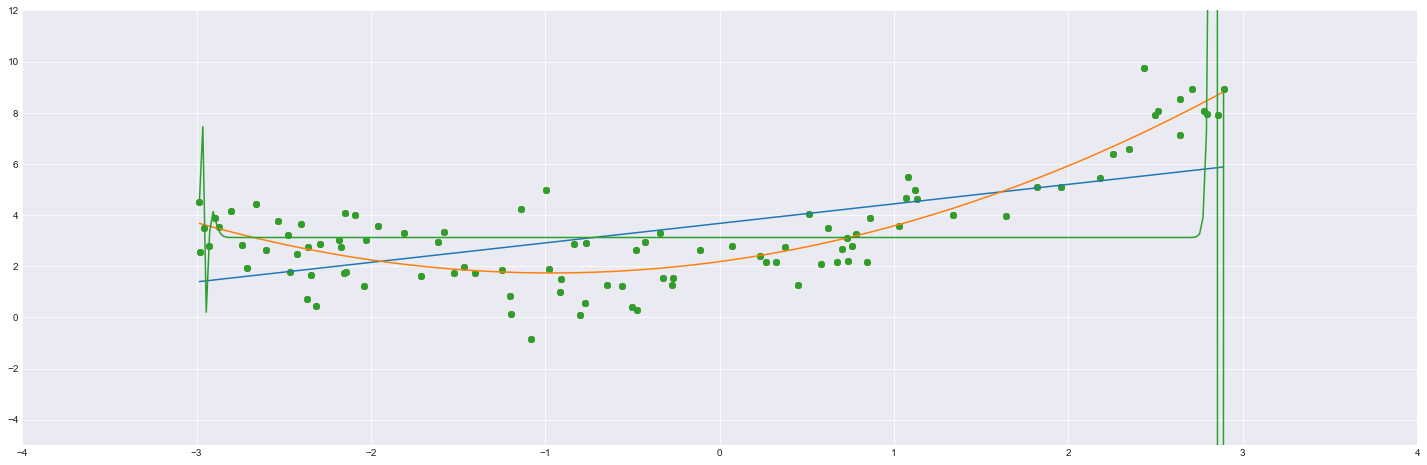

In [102]:
fig, ax = plt.subplots(figsize=(25, 8))
for degree in [1, 2, 300]:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly_features.fit_transform(x)
    x_seq = np.linspace(x.min(), x.max(), 300).reshape(-1,1)
    
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly, y)  
    
    plt.scatter(x, y)
    x_seq_transf = poly_features.fit_transform(x_seq)
    plt.plot(x_seq, lin_reg.predict(x_seq_transf), label=degree)
ax.set_ylim([-5, 12])
ax.set_xlim([-4, 4])

In [134]:
lm = LinearRegression().fit(X, y)

In [135]:
#criando dados não lineares

def geraDados():
    m = 100
    X = 6 * np.random.rand(m, 1) - 3
    X = np.sort(X.reshape(-1,)).reshape(-1,1)
    y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
    return X, y

In [136]:
X, y = geraDados()
X.shape, y.shape

((100, 1), (100, 1))

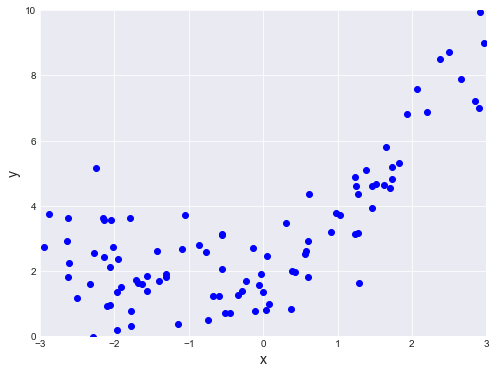

In [137]:
plt.figure(figsize=[8,6])
plt.scatter(X, y, c = "blue")
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

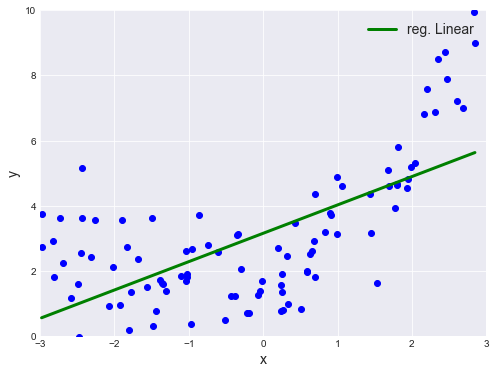

In [138]:
plt.figure(figsize=[8,6])
plt.scatter(x, y, c = "blue")
plt.plot(x, lm.predict(x), c = 'green', lw = 3, label = 'reg. Linear')
plt.legend(fontsize = 14)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [139]:
#criando uma função polinomial de ordem 2
poly_features = PolynomialFeatures(degree = 2, include_bias = False)

In [140]:
X_poly = poly_features.fit_transform(X)
X_poly.shape

(100, 2)

In [141]:
X_poly[:10]

array([[-2.95149136,  8.71130123],
       [-2.880731  ,  8.29861111],
       [-2.634921  ,  6.94280868],
       [-2.6210301 ,  6.86979878],
       [-2.61904726,  6.85940856],
       [-2.6096009 ,  6.81001685],
       [-2.50500431,  6.27504657],
       [-2.32838193,  5.42136241],
       [-2.28485936,  5.2205823 ],
       [-2.26858571,  5.14648113]])

In [142]:
# X_poly cria uma coluna com o quadrado de x
np.c_[ X[:10],  X[:10]**2 ]

array([[-2.95149136,  8.71130123],
       [-2.880731  ,  8.29861111],
       [-2.634921  ,  6.94280868],
       [-2.6210301 ,  6.86979878],
       [-2.61904726,  6.85940856],
       [-2.6096009 ,  6.81001685],
       [-2.50500431,  6.27504657],
       [-2.32838193,  5.42136241],
       [-2.28485936,  5.2205823 ],
       [-2.26858571,  5.14648113]])

In [143]:
poly_fit = LinearRegression() #também poderíamos ter usado nossa classe regLinear com gradient descent!
poly_fit.fit(X_poly, y)

poly_fit.intercept_, poly_fit.coef_

(array([1.9145928]), array([[1.00773483, 0.51198155]]))

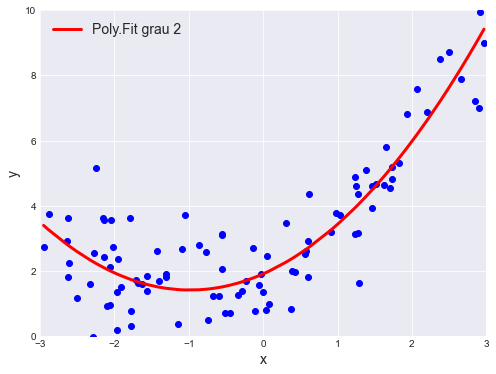

In [144]:
y_new = poly_fit.predict(X_poly)

plt.figure(figsize=[8,6])
plt.scatter(X, y, c = "blue")
plt.plot(X, y_new, "r-", linewidth=3, label="Poly.Fit grau 2")
plt.legend(fontsize = 14)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

<br>

Acima, modelamos y sendo:

### $y = \theta_0 + \theta_1 \cdot X + \theta_2 \cdot X^2$,

ou seja, um polinômio de grau(ordem) 2.

<br>

__Comparando os resultados visualmente:__
    
<br>

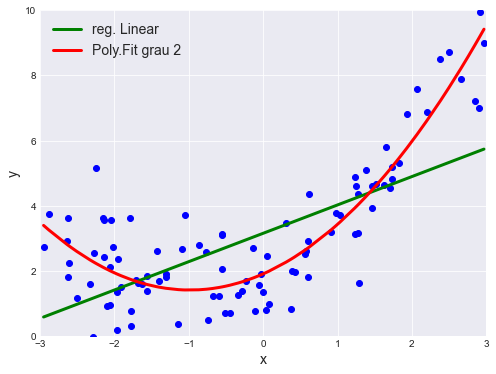

In [145]:
plt.figure(figsize=[8,6])
plt.plot(X, lm.predict(X), c = 'green', lw = 3, label = 'reg. Linear')
plt.scatter(X, y, c = "blue")
plt.plot(X, y_new, "r-", linewidth=3, label="Poly.Fit grau 2")
plt.legend(fontsize = 14)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [147]:
def polyFit(X, y, grau): 
    
    polybig_features = PolynomialFeatures(degree = grau, include_bias = False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    
    #criando um pipeline: sequencia de execução de passos
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    
    polynomial_regression.fit(X, y)
    return polynomial_regression

grau:  1


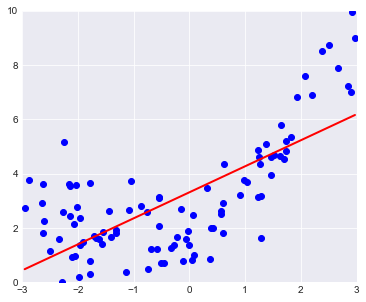

RMSE:
1.6573078875945908
------------------------------------------------


grau:  2


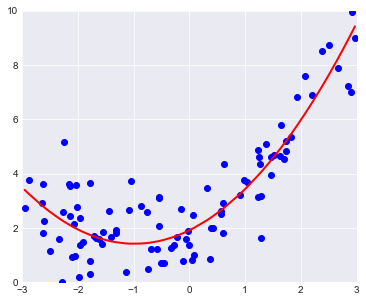

RMSE:
1.0485382796931642
------------------------------------------------


grau:  20


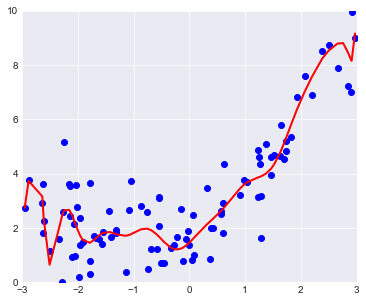

RMSE:
0.9551558632709731
------------------------------------------------


grau:  300


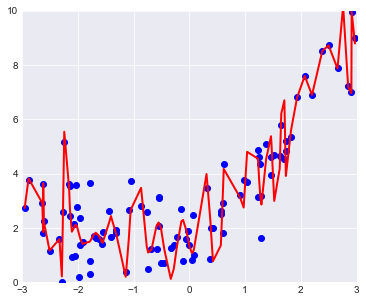

RMSE:
0.8372686998638627
------------------------------------------------




In [148]:
for grau in [1,2,20,300]:  
    
    print("grau: ", grau)
    
    polyfit = polyFit(X, y, grau)
    
    ypoly = polyfit.predict(X)
    
    plt.figure(figsize=[6,5])
    plt.plot(X, ypoly, label=str(grau), lw=2, c = 'red')
    plt.scatter(X, y, c = "blue")
    plt.axis([-3, 3, 0, 10])
    plt.show()
    print("RMSE:")
    print(np.sqrt(np.mean(np.square(y - polyfit.predict(X)))))
    print("------------------------------------------------\n\n")

Analisando apenas o erro nos dados de treino, vemos que o RMSE tende a diminuir a medida que usamos polinômios de graus mais altos.. mas e com dados novos? Será que estamos overfitando?

Vejamos:
<br>

In [149]:
Xnovo, ynovo = geraDados()

grau:  1


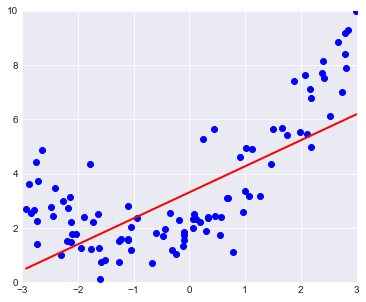

RMSE:
treino: 1.6573078875945908
novos dados: 1.734159521583464
------------------------------------------------


grau:  2


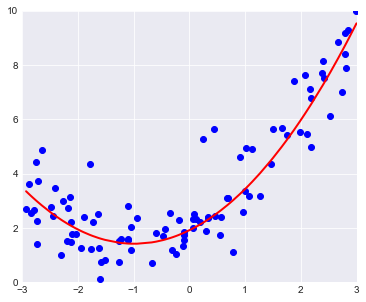

RMSE:
treino: 1.0485382796931642
novos dados: 1.0119606239089036
------------------------------------------------


grau:  20


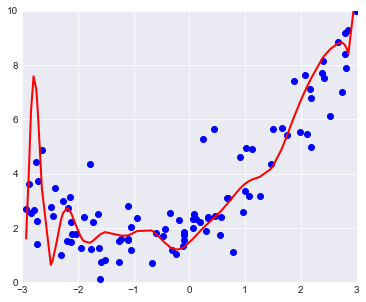

RMSE:
treino: 0.9551558632709731
novos dados: 1.4914657729039564
------------------------------------------------


grau:  300


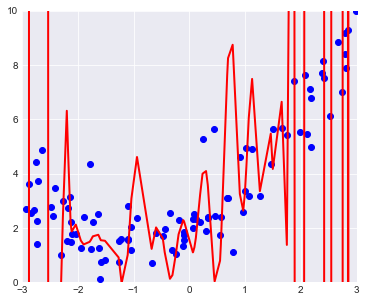

RMSE:
treino: 0.8372686998638627
novos dados: 50695270223222.14
------------------------------------------------




In [150]:
for grau in [1,2,20,300]:
    
    print("grau: ", grau)
    
    polyfit = polyFit(X, y, grau)
    
    ypoly_novo = polyfit.predict(Xnovo)
    
    plt.figure(figsize=[6,5])
    plt.plot(Xnovo, ypoly_novo, label=str(grau), lw=2, c = 'red')
    plt.scatter(Xnovo, ynovo, c = "blue")
    plt.axis([-3, 3, 0, 10])
    plt.show()
    print("RMSE:")
    print('treino:', np.sqrt(np.mean(np.square(y - polyfit.predict(X)))))
    print('novos dados:', np.sqrt(np.mean(np.square(ynovo - polyfit.predict(Xnovo)))))
    print("------------------------------------------------\n\n")

<br>

__Conclusão:__
    
Nitidamente, polinômios de ordens altas acabam __overfitando__ os dados!

No entanto, o __polinômio de grau 2 obteve o melhor resultado:__ obteve um baixo RMSE em treino e conseguiu generalizar bem os dados.

<br>

Como podemos controlar o overfitting de modelos polinomiais com graus altos?

Uma técnica muito comum para isso é a __regularização!__

<br><br>

## Regularização

<br>

Como vimos, modelos polinomiais nada mais são do que regressões lineares, porém utilizando potências das variávies explicativas originais.

Neste contexto, regularizar significa __restringir__ os possíveis valores de $\theta$. Tendo valores de $\theta$ menores, conseguiremos controlar o overfitting.

Existem dois tipos de regularizações mais famosos: a __Ridge__ e a __Lasso.__ 

No caso da regressão linear, vimos que os valores de $\theta$ são escolhidos ao minimizarmos o MSE:

#### $y_{pred} = \theta_0 + \theta_1 \cdot X_1 + .. + \theta_p \cdot X_p$.

#### $\theta = (\theta_0, \theta_1, .., \theta_p)$ 

#### $Custo(\theta) = MSE(\theta) = $ 1/N $\cdot \sum (y_{pred_i} - y_i)^{2}$, 

em que a soma é nas instâncias de treinamento.

<br>

### Regularização Ridge

Nesta regularização, é adicionado um __termo de regularização__ na função de custo MSE, conhecido como __norma L2__.

A função de custo é alterada para:

### $Custo(\theta) = MSE(\theta) + \alpha \cdot \sum {\theta_i}^2$, 
em que a soma $\sum {\theta_i}^2$ é para valores de $i=1, .., p$.

Ainda, veja que o parâmetro $\alpha$ é responsável pela quantidade de regularização. Caso $\alpha$ seja igual a zero, não existe regularização, ou seja:

Ridge($\alpha$=0) = LinearRegression;

Além disso, quanto maior o valor de $\alpha$, maior é a regularização.

Ao treinarmos um modelo com regularização, o objetivo é minimizar a função de custo. Desta forma, caso $\alpha$ seja muito grande, precisaremos de $\theta$ muito pequenos para compensar, logo temos essa restrição dos valores de $\theta$.


<br><br>


### Regularização Lasso

Análogo o caso da Ridge, mas o __termo de regularização__ neste caso é a __norma L1.__

Neste caso, a função de custo a ser minimizada é:

### $Custo(\theta) = MSE(\theta) + \alpha \cdot \sum |{\theta_i}|$, 
em que a soma $\sum |\theta_i|$ é para valores de $i=1, .., p$.

<br><br>

No python:

In [152]:
from sklearn.linear_model import Ridge, Lasso

In [153]:
def polyFitReg(X, y, grau, base_model, base_model_name):
    
    polybig_features = PolynomialFeatures(degree = grau, include_bias = False)
    std_scaler = StandardScaler()
    basemodel = base_model
    
    #criando um pipeline: sequencia de execução de passos
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            (base_model_name, base_model),
        ])
    
    polynomial_regression.fit(X, y)
    return polynomial_regression

Ridge_ alpha: 0


C:\Users\gilma\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


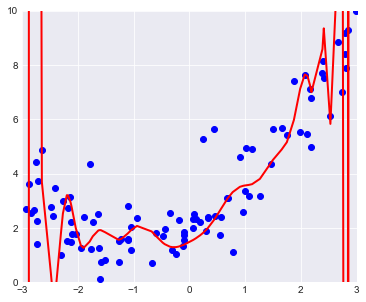

RMSE:
treino: 0.8858476787846559
novos dados: 37244.1866126068
------------------------------------------------


Ridge_ alpha: 0.001


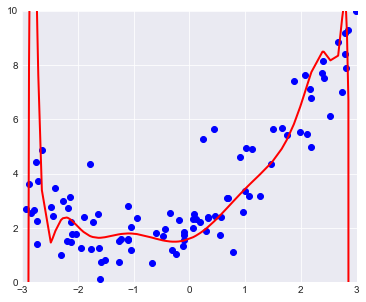

RMSE:
treino: 0.9323494242089269
novos dados: 128.46229051342368
------------------------------------------------


Ridge_ alpha: 0.01


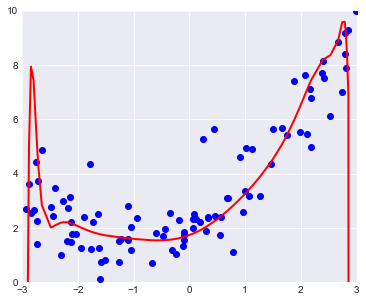

RMSE:
treino: 0.9629851775259818
novos dados: 60.33901341732543
------------------------------------------------


Ridge_ alpha: 0.1


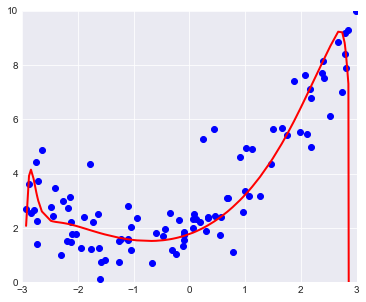

RMSE:
treino: 0.9894617869254664
novos dados: 18.514639383505315
------------------------------------------------


Ridge_ alpha: 1


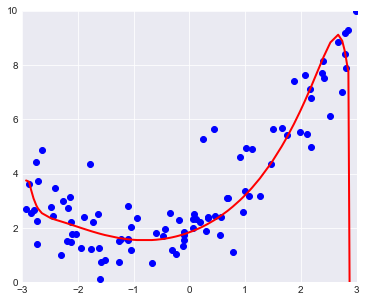

RMSE:
treino: 1.0000933834379575
novos dados: 5.624976274530857
------------------------------------------------


Ridge_ alpha: 10


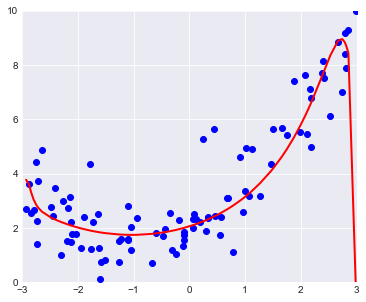

RMSE:
treino: 1.0368593872565284
novos dados: 1.5335225580626108
------------------------------------------------


Ridge_ alpha: 100


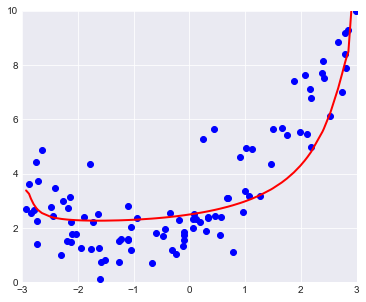

RMSE:
treino: 1.3316361555648133
novos dados: 1.348287109815235
------------------------------------------------


Ridge_ alpha: 200


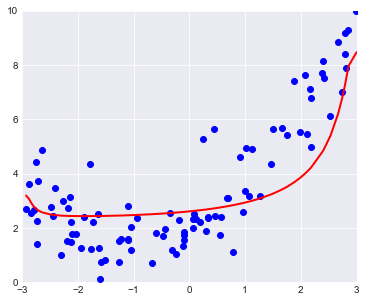

RMSE:
treino: 1.48373342587594
novos dados: 1.5132827989867184
------------------------------------------------




In [154]:
grau = 200 

for alpha in [0, 0.001, 0.01, 0.1, 1, 10, 100, 200]:
    
    model_name = 'Ridge_ alpha: '+str(alpha)
    polyfit = polyFitReg(X, 
                         y, 
                         grau, 
                         base_model = Ridge(alpha = alpha), 
                         base_model_name = model_name)
    
    ypoly_novo = polyfit.predict(Xnovo)

    print(model_name)
    plt.figure(figsize=[6,5])
    plt.plot(Xnovo, ypoly_novo, label=str(grau), lw=2, c = 'red')
    plt.scatter(Xnovo, ynovo, c = "blue")
    plt.axis([-3, 3, 0, 10])
    plt.show()
    print("RMSE:")
    print('treino:', np.sqrt(np.mean(np.square(y - polyfit.predict(X)))))
    print('novos dados:', np.sqrt(np.mean(np.square(ynovo - polyfit.predict(Xnovo)))))
    print("------------------------------------------------\n\n")

### Ridge Regression

In [103]:
m = 100
x = np.random.rand(m, 1) - 3
y = np.random.randn(m, 1)

In [104]:
from sklearn.linear_model import Ridge

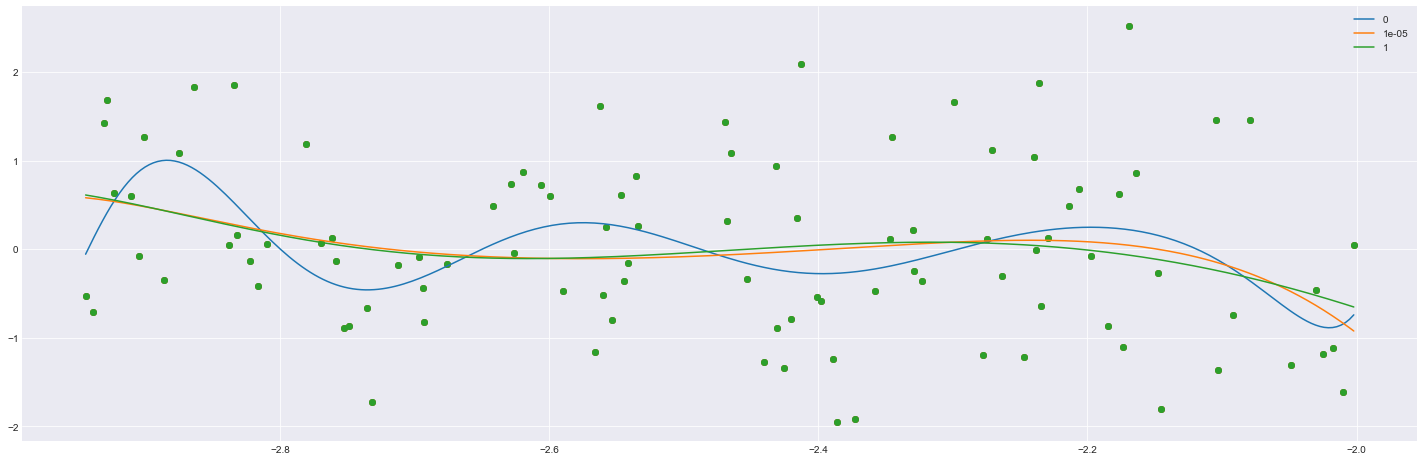

In [105]:
fig, ax = plt.subplots(figsize=(25, 8))
for alpha in [0, 1e-5, 1]:
    poly_features = PolynomialFeatures(degree=10, include_bias=False)
    x_poly = poly_features.fit_transform(x)
    x_seq = np.linspace(x.min(), x.max(), 300).reshape(-1,1)
    
    ridge_reg = Ridge(alpha=alpha, solver="cholesky")
    ridge_reg.fit(x_poly, y)  
    
    plt.scatter(x, y)
    x_seq_transf = poly_features.fit_transform(x_seq)
    plt.plot(x_seq, ridge_reg.predict(x_seq_transf), label=alpha)
ax.legend()

### Regressão Logística

In [106]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [107]:
x = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)

C:\Users\gilma\AppData\Local\Temp\ipykernel_13660\1103034402.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


In [108]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x, y)

LogisticRegression()

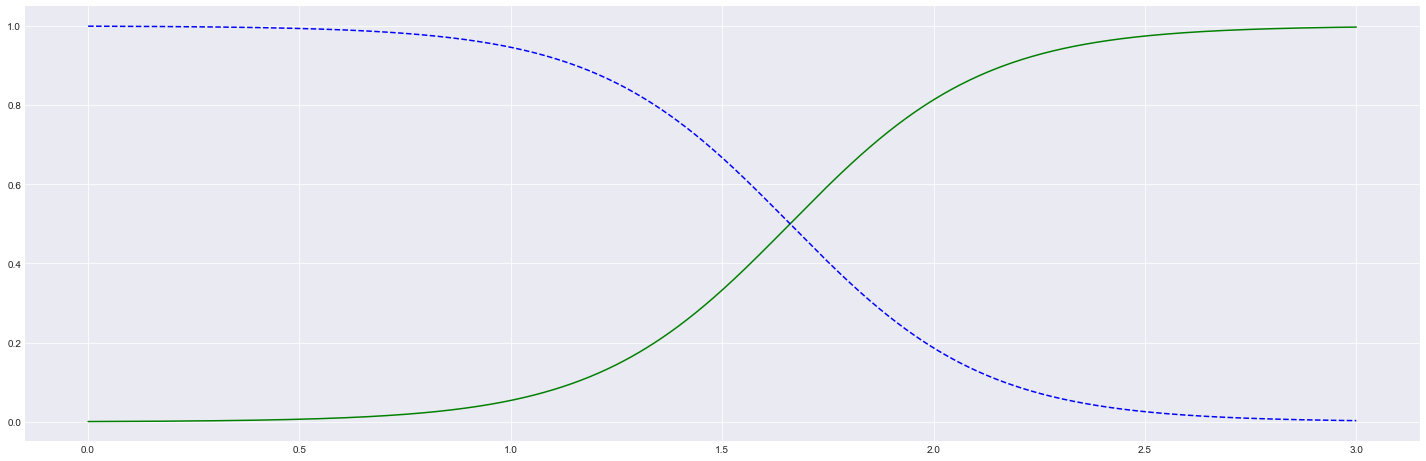

In [109]:
fig, ax = plt.subplots(figsize=(25, 8))
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

### Softmax Regression

In [110]:
x = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(x, y)

LogisticRegression(C=10, multi_class='multinomial')

In [111]:
0.5 * np.log(1/0.5) + 0.5 * np.log(1/0.5)

0.6931471805599453

In [112]:
softmax_reg.predict([[5, 2]])
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

C:\Users\gilma\AppData\Local\Temp\ipykernel_13660\3333308993.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


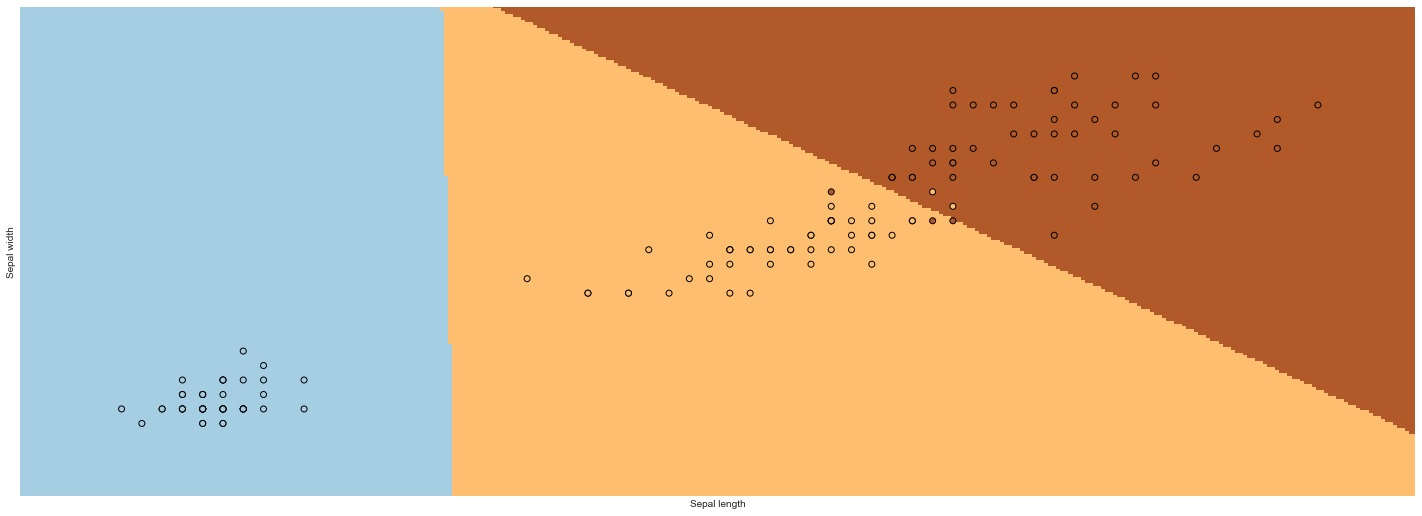

In [113]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = softmax_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(25, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()